# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление

[Шаг 1. Открытие файла с данными и изучение общей информации](#step1)

[Шаг 2. Предобработка данных](#step2)

[Шаг 3. Подсчет и добавление в таблицу](#step3)

[Шаг 4. Исследовательский анализ данных](#step4)

[Шаг 5. Общий вывод](#step5)

[Чек-лист готовности проекта](#check-list)


### Шаг 1. Открытие файла с данными и изучение общей информации <a name="step1"></a>

Для того, чтобы начать исследование, необходимо установить необходимые библиотеки:

In [1]:
#установим библиотеки, необходимые для исследования
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
#прочтем файл с исходным датасетом и запишем данные в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

При первом чтении датасета было выявлено, что значения в исходной таблице склеены. Исправим это прописав параметр **sep** в функции ***read_csv()***.

In [3]:
#выведем первые 5 строк датасета
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь наша таблица читабельна. 

In [4]:
#выведем основную информацию о качественных показателях данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

При дальнейшем осмотре данных выявлено, что в 12 столбцах из 22 присутствуют пропуски, а именно: *ceiling_height*, *living_area*, *is_apartment*, *kitchen_area*, *balcony*, *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*, *days_exposition*.

На этапе предобработки данных необходимо оценить количество пропусков и их влияние на достоверность даных, найти причины их возникновения и пути решения.  


Изучим основные количественные показатели данных.

In [5]:
#выведем информацию об основных значениях данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Оценив визуально качественные и количественные характеристики исходного датасета можно с уверенностью сказать, что необходима предварительная очистка и предобработка данных для дальнейшего анализа.

Были выявлены основные моменты, которые предстоит очистить для проведения дальнейшего анализа:

- *total_images* - проверить на 0 и на выбросы;

- *last_price* - перевести суммы в более крупные единицы;

- *total_area* - проверить на выбросы (т.к. std имеет значительное отклонение);

- *rooms* - проверить на 0 и на выбросы;

- *ceiling_height* - проверить происхождение NaN и выбросов;

- *kitchen_area*, *living_area*, *balcony* и *floors_total* - проверить происхождение NaN;

- *floor* - провести категоризацию;

- *cityCenters_nearest* и *airports_nearest* - перевести м в км и проверить происхождение NaN;

- *parks_around3000*, *ponds_around3000*, *parks_nearest* и *ponds_nearest* - проверить происхождение NaN;

- days_exposition - проверить происхождение NaN и выбросов.

Также необходимо поменять тип данных столбца *first_day_exposition* на форму даты и времени; *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000*, *days_exposition* привести к целочисленным значениям; а данные *is_apartment* в булев тип.

### Шаг 2. Предобработка данных <a name="step2"></a>

Приступим к очистке данных.

Начнем с замены типа данных: *first_day_exposition* - в datetime, а *is_apartment* в булев тип.

In [6]:
#переведем данные столбца 'first_day_exposition' в тип datetime64
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
#переведем данные столбца 'is_apartment' в тип bool
df['is_apartment'] = df['is_apartment'].astype('bool')
#посмотрим результат
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

Данные столбцов переведены в нужный тип данных.

Для дальнейшего удобства подсчета цен переведем данные столбца *last_price* в более крупные единицы - например в тысячи у.е.

In [7]:
#поделим цены на 1000
df['last_price'] = df['last_price']/1000
#посмотрим значения полученного столбца
print(df['last_price'].head())

0    13000.0
1     3350.0
2     5196.0
3    64900.0
4    10000.0
Name: last_price, dtype: float64


Укрупнение величин прошло успешно. 

Приступим к обработке пропущенных значений. На этапе ознакомления с датасетом было выявлено множественное наличие пропусков в большом количестве столбцов. Посмотрим датасет и постараемся пошагово найти причины их возникновения.

In [8]:
#выведем сумму пропусков по всем столбцам
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Визуально оценив масштаб пропущенных значений можно ужаснуться, но необходимо трезво оценить какими данными мы пожертвуем, не нанеся урона качеству датасета, а какие заменим или категоризируем.

Можно выделить два столбца с небольшим количеством пропущенных значений, которыми мы (после логического брейн-шторма) можем пожертвовать и дропнуть эти строки -  *floors_total* и *locality_name* - так как никакой логической замены им не возможно придумать. 

In [9]:
#удалим столбцы 'floors_total' и 'locality_name'
df.dropna(subset=['floors_total', 'locality_name'], inplace=True)
#выведем сумму пропусков по всем столбцам
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Удаление строк с пустыми значениями прошло успешно. 

Далее прежде чем перейти к замене пустых значений высоты потолков посмотрим основную информацию о количественных показателяъ столбца *ceiling_height* и выберем, чем будем заменять: медианой или средним значением.

In [10]:
#выведем информацию об основных значениях столбца 'ceiling_height'
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медиана более чем подходит нам под стандарт нормальных потолков - также мы обнаружили аномальные значения равные 1 метр и 100 метров. Попробуем определить выбросы с помощью построяния диаграммы размаха или ящика с усами.

<AxesSubplot:>

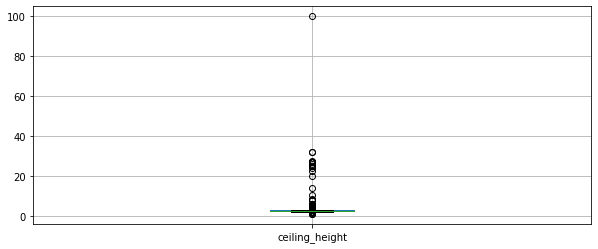

In [11]:
#построим диаграмму размаха
df.boxplot('ceiling_height', figsize = (10,4))

Достаточно сложно визуально оценить точное нахождение всеч квартилей для заданных данных, однако отчетливо видно наличие выбросов.

При определении задаваемых параметров для высоты потолков мы будем руководствоваться практической логикой - высота потолка по стандартам не может быть меньше 2,2 метров и выше условно 5 метров (берем в расчет старый фонд). Соответсвенно все что не входит в этот диапазон заменим медианым значением. 

Для этого сначала заменим все выбросы на NaN и следующим шагом все пропуски заменим на медианное значение.

In [12]:
#произведем замену значений в рамках диапазона от 2.2 м до 5 м на NaN
df.loc[(df['ceiling_height'] >= 5), 'ceiling_height'] = np.nan
df.loc[(df['ceiling_height'] <= 2.2), 'ceiling_height'] = np.nan
#выведем сумму пропусков по столбцу 'ceiling_height'
df['ceiling_height'].isna().sum()

9136

Количество пропусков в столбце *ceiling_height* увеличилось - это и были наши выбросы. 

Теперь произведем замену всех пропусков на медиану и проверим ка кизменились наши количественные параметры.

In [13]:
#заменим пустые значения на значение медианы
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [14]:
#выведем информацию об основных значениях столбца 'ceiling_height'
df['ceiling_height'].describe()

count    23565.000000
mean         2.696278
std          0.214703
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

Отметим что стандартное отклонение выборки (std) уменьшилось и теперь близко к нулю, что означает однородность данных.

Пропуски и выбросы в столбце *ceiling_height* были устранены - теперь данные о высоте потолков равномерны.

Перейдем к данным в стобце *living_area*. Предположим, что целесообразно заменить данные пропуски меданой относительно количества комнат в квартире, так как чем больше комнат - тем больше площадь и наоборот. Проверим это с помощью графика распределения.

Text(0, 0.5, 'Площадь,м2')

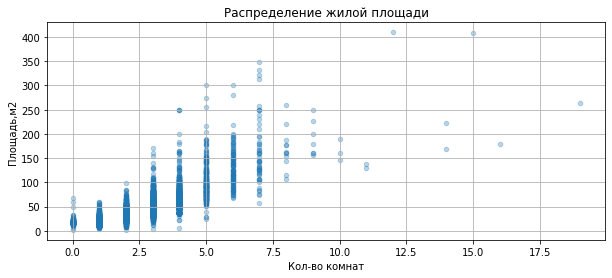

In [15]:
#построим график распредления с виде зависимости 
ax = df.plot(kind='scatter', x='rooms', y='living_area', alpha=0.3,  grid=True, figsize = (10,4), title='Распределение жилой площади')
ax.set_xlabel('Кол-во комнат')
ax.set_ylabel('Площадь,м2')

Действительно наши предположения подтвердились и мы можем выполнить такую замену.

In [16]:
#заменим пропуски на медиану относительно количества комнат
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))
#выведем информацию об основных значениях столбца 'ceiling_height'
df['living_area'].describe()

count    23565.000000
mean        34.324899
std         21.722006
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Также на этапе визуального анализа было отмечено наличие как подозрительно малой жилой площади квартиры, так и слишком большой площади. 

<AxesSubplot:>

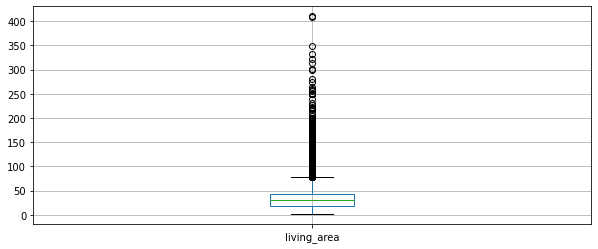

In [17]:
#построим диаграмму размаха
df.boxplot('living_area', figsize = (10,4))

Стоит отметить наличие большого количества выбросов. Также для дальнейшего корректного анализа и построения зависимостей стоит проверить не превышают ли значения жилой площади значения общей площади (это было обнаружено на этапе исследовательского анализа данных, когда анализировались отношения площадей, но было принято решение о переносе этого блока в предобработку).

In [18]:
#посчитаем количество строк, где отмечено противоречие
df.loc[(df['living_area'] > df['total_area'])]['living_area'].count()

29

Обнаружено 29 строк, где значение жилой площади превышают значения общей площади - чего не может быть. Поэтому нам необходимо заменить такие значения на значения равному 80% общей площади.

In [19]:
#заменим превышающие значения жилой площади на соответвующие значения
df.loc[(df['living_area'] > df['total_area']), 'living_area'] = df['total_area']*0.8
#посчитаем количество строк, где отмечено противоречие
df.loc[(df['living_area'] > df['total_area'])]['living_area'].count()

0

Замена произведена успешно, что в дальнейшем поможет избежать ошибок в вычислении отношения площадей.

Перейдем к пропускам в стобце *kitchen_area*.

In [20]:
#выведем сумму пропусков по столбцу 'kitchen_area'
df['kitchen_area'].isna().sum()

2222

Выдвенем аналогичное предыдущему предположение, что целесообразно заменить данные пропуски меданой относительно жилой площади в квартире, так как чем больше жилая площадь - тем просторней кухня. Проверим это с помощью графика распределения.

Text(0, 0.5, 'Площадь,м2')

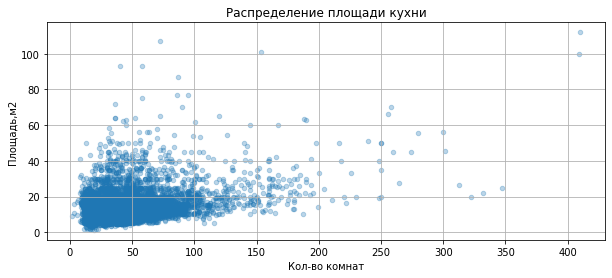

In [21]:
#построим график распредления с виде зависимости 
ax = df.plot(kind='scatter', x='living_area', y='kitchen_area', alpha=0.3, grid=True, figsize = (10,4), title='Распределение площади кухни')
ax.set_xlabel('Кол-во комнат')
ax.set_ylabel('Площадь,м2')

Наши предположения подтвердились и мы можем выполнить такую замену.

In [22]:
#заменим пропуски на медиану относительно жилой площади
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('living_area')['kitchen_area'].transform('median'))
#выведем сумму пропусков по столбцу 'kitchen_area'
df['kitchen_area'].isna().sum()

69

После замены все равно остались пустые строки - вероятнее всего что по сформированным группам жилой площади мединные значения отсутствуют.

Посмотрим визуально на строки с оставшимися пропусками.

In [23]:
#сделаем срез строк по пустым значениям
df.query('kitchen_area == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
155,8,96000.000,317.00,2017-07-07,4,3.50,3.0,183.00,3,True,...,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
440,8,2480.000,27.11,2018-03-12,0,2.65,17.0,24.75,4,True,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
1588,3,1900.000,21.89,2018-11-01,1,2.65,19.0,10.93,17,True,...,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,22.0
1595,7,3200.000,62.40,2019-04-23,4,2.65,5.0,49.92,2,True,...,NaN,1.0,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2563,4,3170.000,28.40,2018-07-26,0,2.65,23.0,20.46,2,True,...,NaN,2.0,Санкт-Петербург,21460.0,16788.0,0.0,NaN,1.0,170.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22106,2,3577.388,28.86,2017-06-29,1,2.75,14.0,18.28,9,True,...,NaN,0.0,Санкт-Петербург,18039.0,4352.0,0.0,NaN,0.0,NaN,3.0
22306,8,1850.000,41.00,2017-12-18,3,2.50,5.0,32.80,5,True,...,NaN,NaN,деревня Пудомяги,NaN,NaN,NaN,NaN,NaN,NaN,45.0
22391,15,2650.000,26.05,2018-03-06,0,2.65,17.0,14.25,12,True,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,23.0
22631,0,4950.000,58.66,2017-01-20,2,2.65,27.0,18.93,21,True,...,NaN,0.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,84.0


In [24]:
#произведем замену оставшихся пустых значений на медиану
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
#выведем сумму пропусков по столбцу 'kitchen_area'
df['kitchen_area'].isna().sum()

0

Пропуски устранены.

In [25]:
#выведем информацию об основных значениях столбца 'kitchen_area'
df['kitchen_area'].describe()

count    23565.000000
mean        10.516037
std          5.669306
min          1.300000
25%          7.300000
50%          9.500000
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64

Также на этапе визуального анализа было отмечено наличие как подозрительно малой площади кухни, так и слишком большой площади. 

<AxesSubplot:>

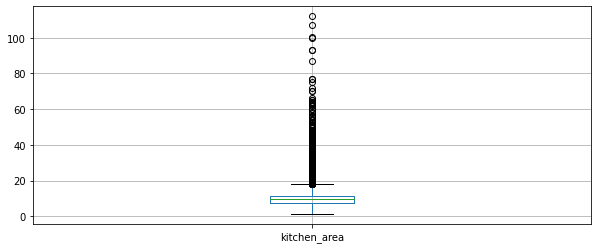

In [26]:
#построим диаграмму размаха
df.boxplot('kitchen_area', figsize = (10,4))

Аналогично ситуации с жилой площадью стоит отметить наличие большого количества выбросов. Также для дальнейшего корректного анализа и построения зависимостей стоит проверить не превышают ли значения площади кухни значений жилой площади (это было обнаружено на этапе исследовательского анализа данных, когда анализировались отношения площадей, но было принято решение о переносе этого блока в предобработку).

In [27]:
#посчитаем количество строк, где отмечено противоречие
df.loc[(df['kitchen_area'] > df['living_area'])]['kitchen_area'].count()

395

Обнаружено 395 строк, где значение площади кухни превышают значения жилой площади - чего не может быть. Поэтому нам необходимо заменить такие значения на значения на пропорционально допустимые - 20% от жилой площади.

In [28]:
#создадим переменную для пропорционыльных значений площади кухни
kitchen_area_proportion = df['living_area']*0.2
#заменим пропуски на пропорциональную переменную
df.loc[(df['kitchen_area'] > df['living_area']), 'kitchen_area'] = kitchen_area_proportion

In [29]:
#посчитаем количество строк, где отмечено противоречие
df.loc[(df['kitchen_area'] > df['living_area'])]['kitchen_area'].count()

0

Замена произведена успешно, что в дальнейшем поможет избежать ошибок в вычислении отношения площадей.

Перейдем к пропускам в стобце *balcony*.

Относительно ситуации с балконами - вероятней всего предположить, что данные неполные в результате влияния на них внешних факторов - либо выгрузка неверна, либо данные заполнены не полностью. Нужно в дальнейшем уделить большее внимание к выгрузке данных. А пока заменим пропуски - для начала заменим пропуски на медианное значение относительно общей площади квартиры (балкон - это не жилая площадь и квартиры без балконов достаточно редки).

In [30]:
#заменим пропуски на медиану относительно общей площади
df['balcony'] = df['balcony'].fillna(df.groupby('total_area')['balcony'].transform('median'))
#выведем сумму пропусков по столбцу 'balcony'
df['balcony'].isna().sum()

754

После замены все равно остались пустые строки - вероятнее всего что по сформированным группам жилой площади мединные значения отсутвуют.

In [31]:
#произведем замену оставшихся пустых значений на медиану
df['balcony'] = df['balcony'].fillna(df['balcony'].median())
#выведем сумму пропусков по столбцу 'balcony'
df['balcony'].isna().sum()

0

Пропуски в балконах заменены успешно. 

На этапе визуального анализа данных было выявлено, что значения балконов имеют тип *float64*, однако странно иметь полтора балкона, поэтому после избавления от пропусков мы можем заменить тип данных в столбце *balcony*  на *int64*.

In [32]:
#заменим тип данных в столбце 'balcony'
df['balcony'] = df['balcony'].astype('int64')

Перейдем к разбору инфраструктурных данных - количества парков и водоемов в радиусе 3 километров.

In [33]:
#рассмотрим количественное распределние данных столбца 'parks_around3000'
df['parks_around3000'].value_counts().sort_index()

0.0    10039
1.0     5647
2.0     1736
3.0      643
Name: parks_around3000, dtype: int64

In [34]:
#рассмотрим количественное распределние данных столбца 'ponds_around3000'
df['ponds_around3000'].value_counts().sort_index()

0.0    9029
1.0    5662
2.0    1883
3.0    1491
Name: ponds_around3000, dtype: int64

Стоит отметить, что большинство квартир в радиусе 3 километров не имеют ни одного парка и ни одного водоема - как каменные джунгли.

На основании точного определения значения моды по данных столбца мы можем произвести замену пустых значений на нули.

In [35]:
#произведем замену пустых значений парков и водоемов на медианы
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Визуально посмотрим на распределение количества парков и водоемов после замены.

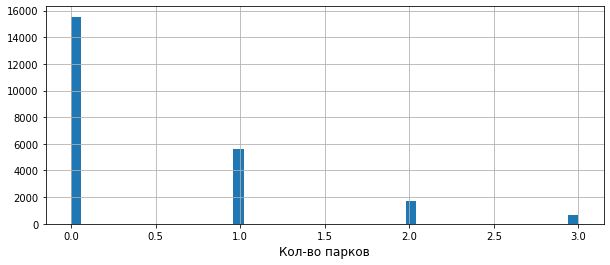

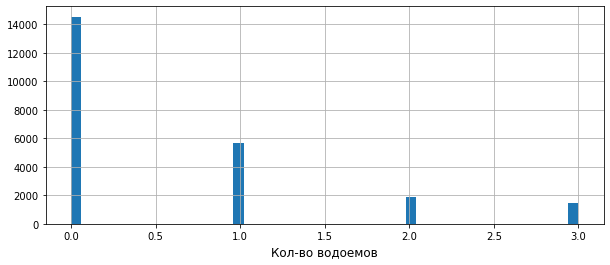

In [36]:
df['parks_around3000'].hist(bins = 50, figsize= (10, 4)).set_xlabel('Кол-во парков', fontsize=12)
plt.show()
df['ponds_around3000'].hist(bins = 50, figsize= (10, 4)).set_xlabel('Кол-во водоемов', fontsize=12)
plt.show()

Распредение не изменилось. Подавляющее большинство квартир все еще не имеют ближайшего доступа к паркам и водоемам.

Теперь, когда нам известно количество парков и водоемов в радиусе 3 километров, нам целесообразно заменить пропуски в расстоянии до этих объектов. 

Переведем метры в километры для удобства визуализации. 

Посмотрим на распределение расстояния до интересующих нас объектов.

Text(0.5, 0, 'Расстояние до объекта, м')

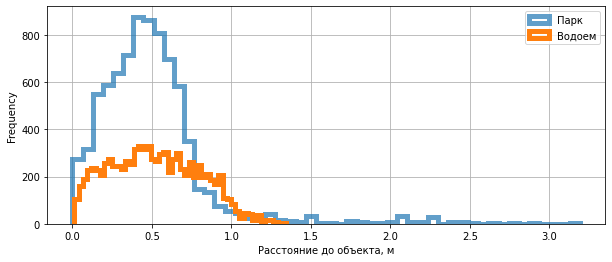

In [37]:
#перевод метров в километры
df['parks_nearest'] = df['parks_nearest'].apply(lambda x: x/1000)
df['ponds_nearest'] = df['ponds_nearest'].apply(lambda x: x/1000)
#построим гистограмму распределения расстояния до парков и водоемов
ax = df.plot(kind='hist', y='parks_nearest', histtype='step', bins=50, linewidth=5, figsize= (10, 4), alpha=0.7, label='Парк')

df.plot(kind='hist', y='ponds_nearest', histtype='step', bins=50, linewidth=5, figsize= (10, 4), ax=ax,  grid=True, label='Водоем')

ax.set_xlabel('Расстояние до объекта, м')

Так как мы заполнили пропуски в данных количества парков и озер в радиусе 3 километров, то можем выявить логическую зависимость - что если в этом радиусе парков и озер ноль, то значит они находятся за пределами 3 километров и логично заменить пропуски в столбце расстояния на значения 3.1 километров, что будет значить, что они располагаются достаточно далеко от местонахождения квартиры.

In [38]:
#проведем замену значений
df['parks_nearest'] = df.groupby('parks_around3000')['parks_nearest'].apply(lambda x: x.fillna(3.1))
df['ponds_nearest'] = df.groupby('ponds_around3000')['ponds_nearest'].apply(lambda x: x.fillna(3.1))

Text(0.5, 0, 'Расстояние до объекта, км')

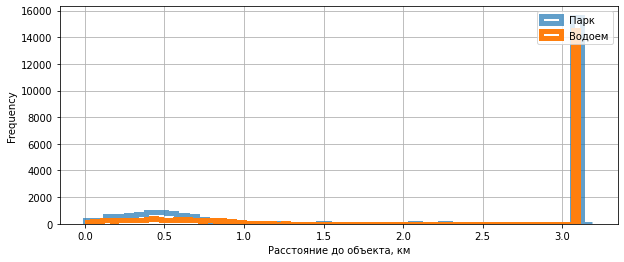

In [39]:
#построим гистограмму распределения расстояния до парков и водоемов
ax = df.plot(kind='hist', y='parks_nearest', histtype='step', bins=50, linewidth=5, figsize= (10, 4), alpha=0.7, label='Парк')
df.plot(kind='hist', y='ponds_nearest', histtype='step', bins=100, linewidth=5, figsize= (10, 4), ax=ax,  grid=True, label='Водоем')
ax.set_xlabel('Расстояние до объекта, км')

Отчетливо видно, что наша замена прошла успешно и теперь можно сделать вывод, что большинство квартир в ближайшей доступности не имеют парков и водоемов.

Перейдем к исследованию данных о расстояние до аэропорта и центра населенного пункта, в котором находятся наши объекты.

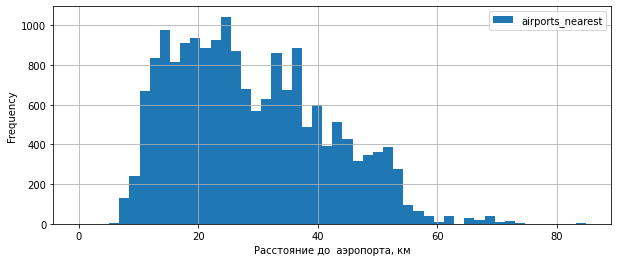

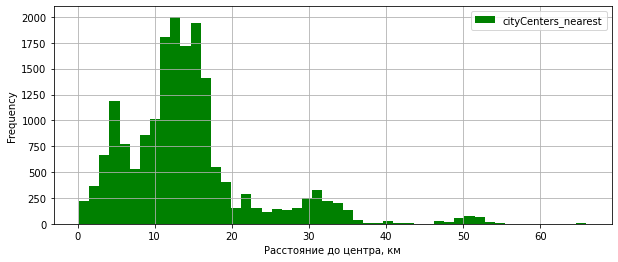

In [40]:
#перевод метров в километры
df['airports_nearest'] = df['airports_nearest'].apply(lambda x: x/1000)
df['cityCenters_nearest'] = df['cityCenters_nearest'].apply(lambda x: x/1000)
#построим гистограммы распределения расстояния до аэропорта и центра
ax = df.plot(kind='hist', y='airports_nearest', bins=50, linewidth=5, figsize= (10, 4), grid=True, legend=True)
ax.set_xlabel('Расстояние до  аэропорта, км')
plt.show()
ax = df.plot(kind='hist', y='cityCenters_nearest', bins=50, linewidth=5, figsize= (10, 4), color='green', grid=True, legend=True)
ax.set_xlabel('Расстояние до центра, км')
plt.show()

Можно отметить, что подавляющее большинство объектов расположены достаточно удаленно от центра и от воздушного порта.

Все же у нас с этих данных находятся пропуски, поэтому попробуем их безболезненно заменить.

In [41]:
#заменим пропуски на медиану относительно населенного пункта
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))
##выведем сумму пропусков по столбцу 'airports_nearest'
df['airports_nearest'].isna().sum()

5432

Небольшая часть данных была заменена, но все же остались пустые значения. Есть предположение, что пропуски для замены возникли в результате того, что по всем объектам из этих населенных пунктов ни у одного не указаны искомые расстояния.

In [42]:
#отберем города в которых значения расстояния до аэропорта пропущены
df.query('airports_nearest == "NaN"').groupby('locality_name')['airports_nearest'].unique()

locality_name
Бокситогорск            [nan]
Волосово                [nan]
Волхов                  [nan]
Всеволожск              [nan]
Выборг                  [nan]
                        ...  
село Путилово           [nan]
село Рождествено        [nan]
село Русско-Высоцкое    [nan]
село Старая Ладога      [nan]
село Шум                [nan]
Name: airports_nearest, Length: 338, dtype: object

In [43]:
#отберем города в которых значения расстояния до центра пропущены
df.query('cityCenters_nearest == "NaN"').groupby('locality_name')['cityCenters_nearest'].unique()

locality_name
Бокситогорск            [nan]
Волосово                [nan]
Волхов                  [nan]
Всеволожск              [nan]
Выборг                  [nan]
                        ...  
село Путилово           [nan]
село Рождествено        [nan]
село Русско-Высоцкое    [nan]
село Старая Ладога      [nan]
село Шум                [nan]
Name: cityCenters_nearest, Length: 345, dtype: object

Наше предположение оправдалось. Есть группы (по locality name), в которых полностью не указаны расстояния до аэропорта и центра. То есть рассчитывать медиану даже не из чего, там везде пропуски. Соответсвенно эти пропуски мы оставим без замены - так как их удаление исказит качество данных, а заменить попросту нечем. Необходимо обратить внимание при последующих выгрузках картогрофических данных.

In [44]:
##выведем сумму пропусков
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
cityCenters_nearest     5501
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

Далее вероятно предположить, что пропуски в количестве дней продажи могут говорить о том, что объявление еще актуально. Поэтому мы их оставим без замены. 

Далее в ходе исследования было выявлено наличие нулей в данных столбца *rooms*, поэтому было решено перенести очистку от нулей на этот этап. 
Исследуем происхождение нулевых значений. Для этого выдвенем гипотезу о том, что нули в комнатах могли возникнуть по причине того, что квартиры являются студиями. В обратном случае, если квартира не студия, наличие нулей является отклонением и от него нужно избавиться.

In [45]:
#подсчет количества нулевых комнат, но не студий
df.loc[(df['rooms'] == 0) & (df['studio'] == False)]['rooms'].count()

59

In [46]:
#посмотрим описание количественных значений
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Обнаружено 59 квартир, которые имеют в количестве комнат нули и при этом не считаются студиями. В таком случае нули необходимо заменить на медианы в зависимости от жилой площади квартиры.

In [47]:
#создадим переменную для выбора медианы в зависимости от жилой площади
rooms_median = df.groupby('living_area')['rooms'].transform('median')
#заменим нули в количестве комнат на меданы
df.loc[(df['rooms'] == 0) & (df['studio'] == False), 'rooms'] = rooms_median

In [48]:
#подсчет количества нулевых комнат но не студий
df.loc[(df['rooms'] == 0) & (df['studio'] == False)]['rooms'].count()

0

Данные по комнатам-нестудиям очищены от нулей.

### Вывод

В ходе этапа "Предобработка данных" было проведено: 

- замена типа данных в столбцах *first_day_exposition* - в datetime, а *is_apartment* в булев тип; 

- укрупнение значения цен; 

- обработака пропущенные значения в столбцах: 'floors_total', 'locality_name', 'ceiling_height', 'living_area', 'kitchen_area', 'balcony,  'parks_around3000' и 'ponds_around3000' и соответственно им заполнены 'parks_nearest' и 'ponds_nearest'. Данные столбцов 'airports_nearest', 'cityCenters_nearest', ‘days_exposition’ оставлены без замены пропусков. 

- обнаружение и устранение выбросов в столбцах 'living_area' и 'kitchen_area', а также нулевые значения по данным столбца 'rooms'. 

Относительно ситуации с пропущенными значениями - вероятней всего предположить, что пропуски могли возникнуть в результате влияния на данные внешних факторов - либо выгрузка неверна, либо данные заполнены не полностью в виду необязательности их заполнения (пропуски возникли на этапе ввода данных клиентом, так как возможно поля, в которых имелись такие отклонения, не являются обязательными для заполнения и клиенты имеют возможность их проигнорировать). Нужно в дальнейшем уделить большее внимание к выгрузке данных. А также проработать поля форм заполнения данных, которые нам необходимы для полного корректного анализа.

### Шаг 3. Подсчет и добавление в таблицу <a name="step3"></a>

На данном этапе необходимо посчитать и добавлить в таблицу: 
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Посчитаем цену квадратного метра как соотношение цены и общей площади и сохраним данные в новом столбце.

In [49]:
#цена квадратного метра 
df['price_per_meter'] = df['last_price']/df['total_area']

Переведем даты публикации в дни недели, месяца и года, сохраним данные в новых столбцах.

In [50]:
#публикация по дню недели 
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [51]:
#публикация по месяцу
df['month_exposition'] = df['first_day_exposition'].dt.month

In [52]:
#публикация по году
df['year_exposition'] = df['first_day_exposition'].dt.year

Проведем категоризацию этажей квартиры, присвоя каждой категории значения *первый*, *последний*, *другой*. Для этого создадим функцию категоризации этажей в зависимости от результата сопоставления данных в столбцах *floor* и *floors_total*. Запишем полученные данные в новый столбец.

In [53]:
#функция категоризации этажей
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
#создадим столбец с новыми данными
df['floor_category'] = df.apply(floor_category, axis=1)

Вычислим соотношение жилой и общей площади, а также отношение площади кухни к общей площади. На предыдущем этапе мы провели очистку данных от выбросов, что поможет избежать нам фактологических ошибок (площадь кухни больше жилой площади квартиры или жилая площадь больше общей) в исследовании.

In [54]:
#соотношение жилой площади к общей площади
df['ratio_of_living_area_to_total_area'] = ((df['living_area']/df['total_area'])*100).round(1)
#соотношение площади кухни к общей площади 
df['ratio_of_kitchen_area_to_total_area'] = ((df['kitchen_area']/df['total_area'])*100).round(1)

Посмотрим на добавленные столбцы.

In [55]:
#выведем первые 5 строк датасета
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_of_living_area_to_total_area,ratio_of_kitchen_area_to_total_area
0,20,13000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,True,...,2.0,0.755,NaN,120.370370,3,3,2019,другой,47.2,23.1
1,7,3350.0,40.4,2018-12-04,1.0,2.65,11.0,18.6,1,True,...,0.0,3.100,81.0,82.920792,1,12,2018,первый,46.0,27.2
2,10,5196.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,True,...,2.0,0.574,558.0,92.785714,3,8,2015,другой,61.2,14.8
3,0,64900.0,159.0,2015-07-24,3.0,2.65,14.0,45.0,9,True,...,3.0,0.234,424.0,408.176101,4,7,2015,другой,28.3,6.3
4,2,10000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,True,...,1.0,0.048,121.0,100.000000,1,6,2018,другой,32.0,6.4


### Вывод

В ходе этапа "Подсчет и добавление в таблицу" были посчитаны новые данные и созданы новые столбцы в таблице по: 
- цене квадратного метра;
- дню недели, месяцу и году публикации объявления;
- этажу квартиры; варианты — первый, последний, другой;
- соотношению жилой и общей площади, а также отношению площади кухни к общей.

### Шаг 4. Исследовательский анализ данных <a name="step4"></a>

На данном этапе мы разобьем исследование на шаги. 
- В первом шаге изучим параметры площади, цены, числа комнат и высоты потолков;
- Во втором изучим время продажи квартиры;
- В третьем шаге выявим какие факторы больше всего влияют на стоимость квартиры;
- В четвертом шаге выберем 10 населённых пунктов с наибольшим числом объявлений и проведем их анализ;
- В пятом шаге выделим квартиры в центре Санкт-Петербурга и изучим эти квартиры.

**Шаг первый:** для изучения параметров площади, цены, числа комнат и высоты потолков построим для каждого параметра гистограмму.

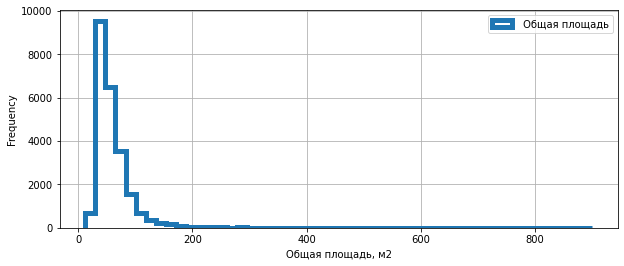

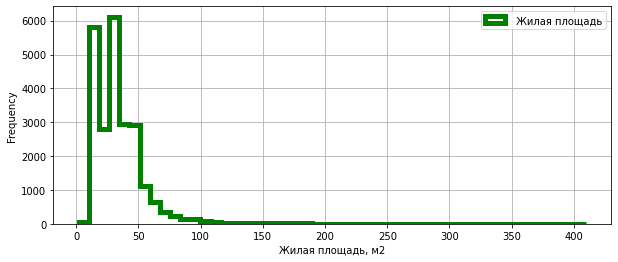

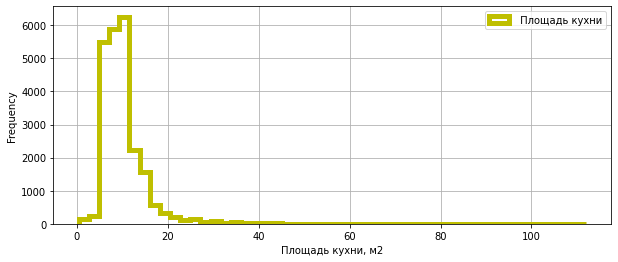

In [56]:
#гистрограмма общей площади
ax = df.plot(kind='hist', y='total_area',histtype='step', bins=50, linewidth=5, figsize= (10, 4), grid=True, label=' Общая площадь')
ax.set_xlabel('Общая площадь, м2')
plt.show()
#гистрограмма жилой площади
ax = df.plot(kind='hist', y='living_area',histtype='step', bins=50, linewidth=5, figsize= (10, 4), color='g', grid=True, label=' Жилая площадь')
ax.set_xlabel('Жилая площадь, м2')
plt.show()
#гистрограмма площади кухни
ax = df.plot(kind='hist', y='kitchen_area',histtype='step', bins=50, linewidth=5, figsize= (10, 4), color='y', grid=True, label=' Площадь кухни')
ax.set_xlabel('Площадь кухни, м2')
plt.show()

На графиках четко видно зависимое распределение площадей - есть единичные квартиры с очень большими площадями, но большая часть площадей квартир коррелируются между собой. Больше всего квартир имеют общую площадь от 30 до 50 м2, жилую площадь в размере от 20 до 30 м2 с площадью кухни от 7 до 9 м2. Из этого следует, что больше всего на рынке недвижимости находится небольших по площади квартир.

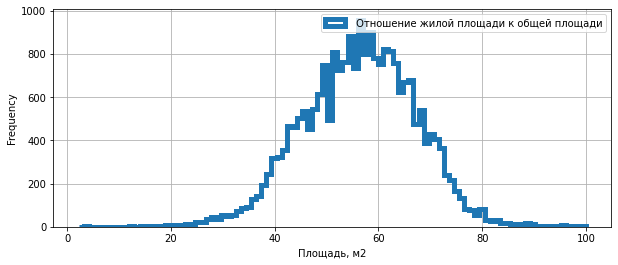

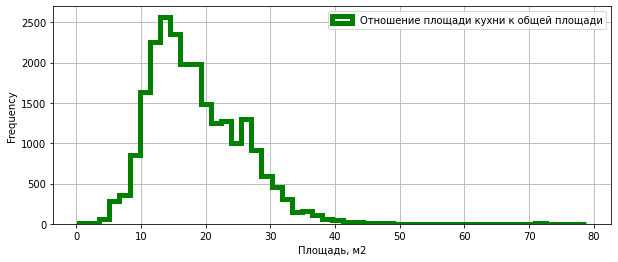

In [57]:
#гистрограмма соотношения жилой площади к общей площади
ax = df.plot(kind='hist', y='ratio_of_living_area_to_total_area',histtype='step', bins=100, linewidth=5, figsize= (10, 4), grid=True, label=' Отношение жилой площади к общей площади')
ax.set_xlabel('Площадь, м2')
plt.show()
#гистрограмма соотношения площади кухни к общей площади
ax = df.plot(kind='hist', y='ratio_of_kitchen_area_to_total_area',histtype='step', bins=50, linewidth=5, figsize= (10, 4), color='g', grid=True, label='Отношение площади кухни к общей площади')
ax.set_xlabel('Площадь, м2')
plt.show()

Жилая площадь исследуемых квартир как правило составляет от 50 до 65 процентов от общей площади объекта, в то время как площадь кухни занимает всего лишь 15 процентов.

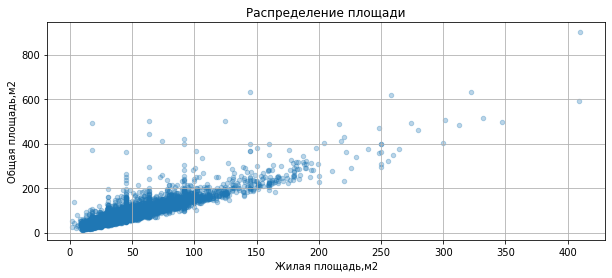

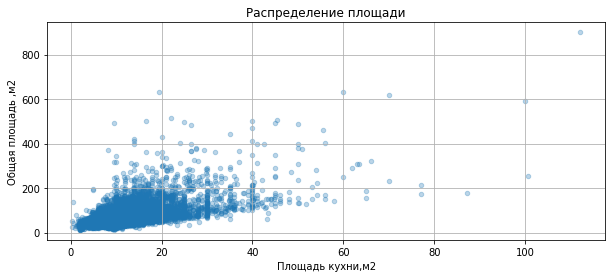

In [58]:
#график распределения жилой площади к общей площади
ax = df.plot(x='living_area', y='total_area', kind='scatter', alpha=0.3, grid=True, figsize = (10,4), title='Распределение площади')
ax.set_xlabel('Жилая площадь,м2')
ax.set_ylabel('Общая площадь,м2')
plt.show()
#график распределения жилой площади к общей площади
ax = df.plot(x='kitchen_area', y='total_area', kind='scatter', alpha=0.3, grid=True, figsize = (10,4), title='Распределение площади')
ax.set_xlabel('Площадь кухни,м2')
ax.set_ylabel('Общая площадь ,м2')
plt.show()

Распределение площадей показывает прямую линейную зависимость жилой площади и площади кухни от общей площади квартиры, что означает -  чем больше общая площадь, тем больше площадь кухни например.

Далее проанализируем ценовые показатели.

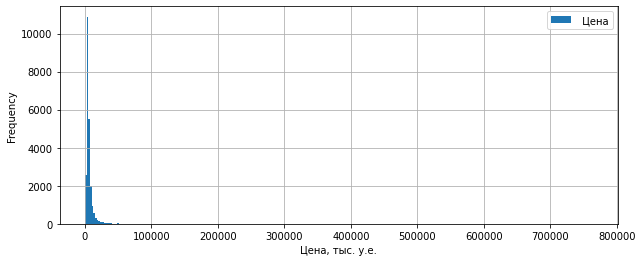

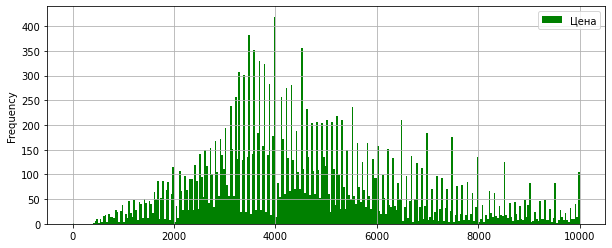

In [59]:
#гистрограмма цен на квартиры
ax = df.plot(kind='hist', y='last_price', bins=300, figsize= (10, 4), grid=True, label=' Цена')
ax.set_xlabel('Цена, тыс. у.е.')
plt.show()
#гистрограмма цен на квартиры в пределах 10 000 у.е.
aбx = df.plot(kind='hist', y='last_price', range=(0,10000), bins=300, figsize= (10, 4), color='g', grid=True, label='Цена')
ax.set_xlabel('Цена, тыс. у.е.')
plt.show()

In [60]:
#посмотрим описание количественных значений
df['last_price'].describe()

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

Данные по ценам равномерны, что отражает нормальное распределение графиков. Большее количество квартир расположены в диапазоне от 500 тыс. у.е. до 10 млн. у.е. Также наблюдаются квартиры как стоимостью до 1 млн. у.е., так и свыше 10 млн. у.е. и даже 700 млн. у.е.  Наибольшее число квартир имеют цену от 2 млн. у.е. до 6 млн. у.е.

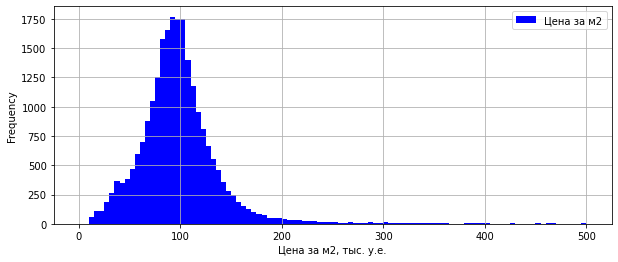

In [61]:
#гистрограмма цен за квадратный метр
ax = df.plot(kind='hist', y='price_per_meter', range=(0,500), bins=100, figsize= (10, 4), color='b', grid=True, label='Цена за м2')
ax.set_xlabel('Цена за м2, тыс. у.е.')
plt.show()

In [62]:
#посмотрим описание количественных значений
df['price_per_meter'].describe()

count    23565.000000
mean        99.405837
std         50.389433
min          0.111835
25%         76.566125
50%         95.000000
75%        114.213198
max       1907.500000
Name: price_per_meter, dtype: float64

Нормальное распределение данных на графике показывает однородность данных. Средняя цена за квадратный метр исследуемых квартир составляет около 100 тыс. у.е. Наибольшее количество квартир имеют стоимость за квадратный метр в диапазоне от 80 тыс. у.е. до 130 тыс. у.е. Также есть количество квартир, которые имеют высокую стоимость за квадратный метр - более 300 тыс. у.е. или совсем циклопическую стоимость метра в 1907,5 тыс. у.е.

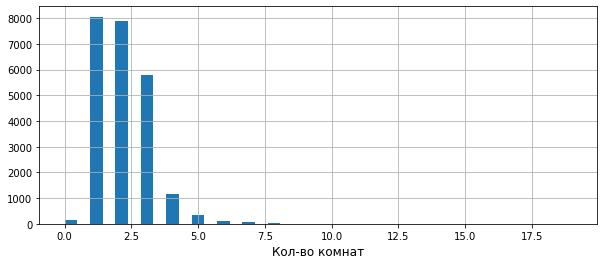

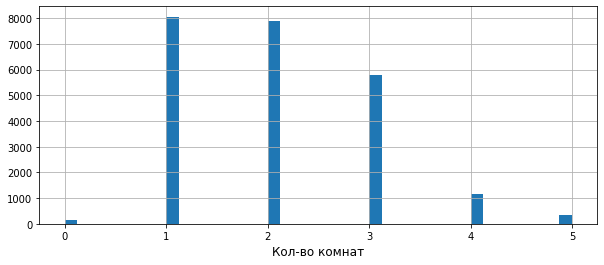

In [63]:
#гистрограмма количества комнат
df['rooms'].hist(bins = 40, figsize= (10, 4)).set_xlabel('Кол-во комнат', fontsize=12)
plt.show()
#гистрограмма количества комнат в диапазоне от 0 до 5
df['rooms'].hist(bins = 40, range=(0,5), figsize= (10, 4)).set_xlabel('Кол-во комнат', fontsize=12)
plt.show()

In [64]:
#количество квартир в разрезе количества комнат
df['rooms'].value_counts()

1.0     8055
2.0     7905
3.0     5779
4.0     1172
5.0      325
0.0      135
6.0      104
7.0       59
8.0       12
9.0        8
10.0       3
11.0       2
14.0       2
16.0       1
19.0       1
15.0       1
12.0       1
Name: rooms, dtype: int64

В анализируемом датасете выявлено преобладание однокомнатных и двухкомнатных квартир - 67 процентов от общего количества квартир. Нередки квартиры большего размера (от 3х до 5ти комнат) - 30 процентов. Также есть 135 студий. Менее 3х процентов составляют квартиры с более чем 5ю комнатами, а в единичных случаях количество комнат может достигать 16 или даже 19.

Text(0.5, 0, 'Высота потолков,м')

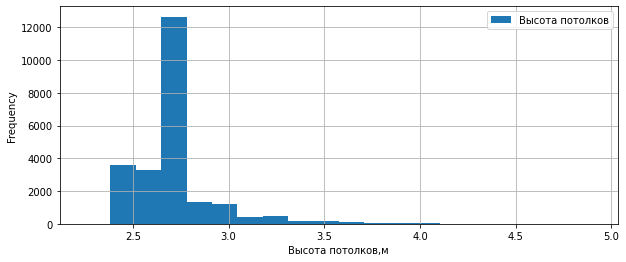

In [65]:
#гистрограмма высоты потолков
ax = df.plot(kind='hist', y='ceiling_height', bins=20, figsize= (10, 4), grid=True, label='Высота потолков')
ax.set_xlabel('Высота потолков,м')

In [66]:
#посмотрим описание количественных значений
df['ceiling_height'].describe()

count    23565.000000
mean         2.696278
std          0.214703
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

Нормальное распределение данных на графике показывает однородность данных. На этапе предобработки данных мы очистили выбросы по данным высоты потолков, приведя их к общепринятым в жизни стандартам. В следствие чего максимальная высота потолков в исследуемом датасете не превышает 5 метров. Средняя высота потолков исследуемых квартир находится в диапазоне от 2,6 до 2,7 метров. Квартиры с потолками выше 3,5 метров достаточно редки.

**Шаг второй:** для изучения времени продажи квартиры необходимо построить гистограммы, выделить средние значение и медианы.

In [67]:
#посмотрим описание количественных значений
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальное время за которое была продана квартира составило 1 день - это удачное стечение обстоятельств или неслучайное задуманное действие, при этом есть объект, который продавался значительно дольше - а точнее 1580 дней или почти 4 года и 4 месяца. Среднее значение дней продажи составляет 181 день, при этом медиана равна 95 дням, что говорит о неравномерности данных (ранее мы сталкивались с пропусками данных и посчитали, что сделка по продаже еще не состоялась). Также о неравномерности свидетельствует большое значение среднего отклонения. Однозначно можно сказать, что половина исследуемых квартир была продана за примерно 3 месяца. Значения 3-го квартиля равно 231 дню, что значит что три четверти всех квартир продавались в течении 7,5 месяцев. Посмотрим наглядно на распределение количества дней продажи. 

Text(0.5, 0, 'Дней')

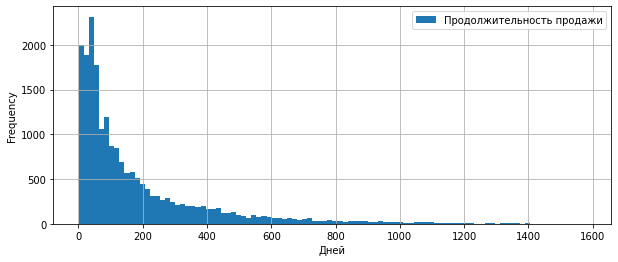

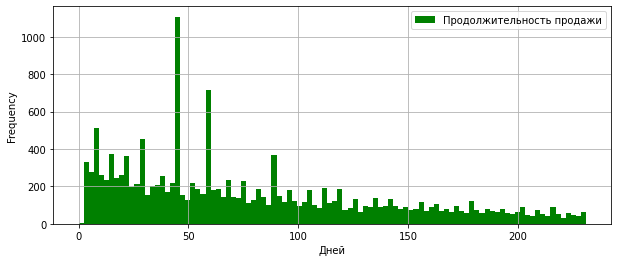

In [68]:
#гистрограмма количества дней продажи
ax = df.plot(kind='hist', y='days_exposition', bins=100, figsize= (10, 4), grid=True, label='Продолжительность продажи')
ax.set_xlabel('Дней')
#гистрограмма количества дней продажи в рамках 3-го квартиля
ax = df.plot(kind='hist', y='days_exposition', bins=100, range=(0,231), figsize= (10, 4), color='g', grid=True, label='Продолжительность продажи')
ax.set_xlabel('Дней')

На графике отмечается несколько пиков вколичества дней продаж, а именно в районе 45 дней или 1,5 месяцев, 60 дней или двух месяцев и 90 дней или трех месяцев. Однако стоит отметить, что за пределами 3го квартиля осталось достаточное количетсво квартир, у которых срок продажи превышает год. Возможно на это влияет множество факторов - от цены и квадратуры, до расположения относительно инфраструктурных объектов.

<AxesSubplot:>

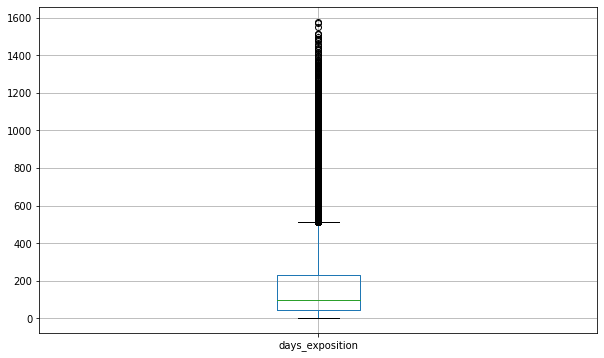

In [69]:
#построим диаграмму размаха
df.boxplot(column='days_exposition', figsize= (10, 6))

Отчетливо видно, что аномальные значения лежат до отметки в 50 дней и продолжаются с отметки 450 дней. То есть все что продалось быстрее 50 дней - удачное стечение обстоятельств, заниженная цена или другие факторы, которые могли ускорить продажу, соответсвенно продажи дольше 450 дней мы можем считать аномально долгими и нам необходимо найти факторы, которые увеличивают этот срок (уникальность объекта, высокая цена, невыгодное расположение).

Посмотрим как распределяются количество объявлений в зависимости от дня, месяца или года публикации.

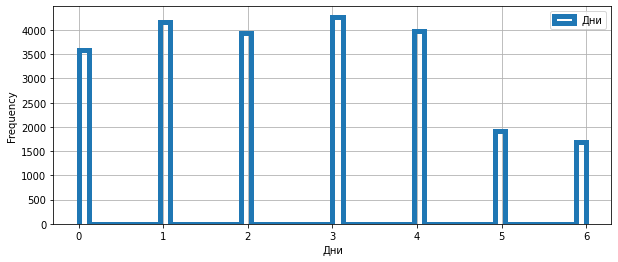

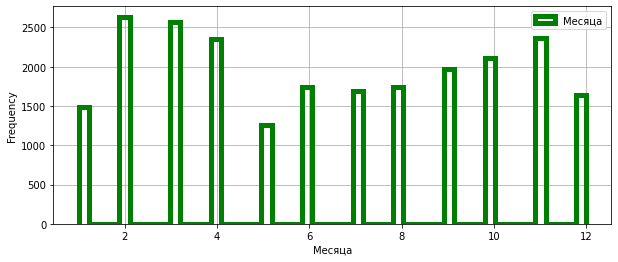

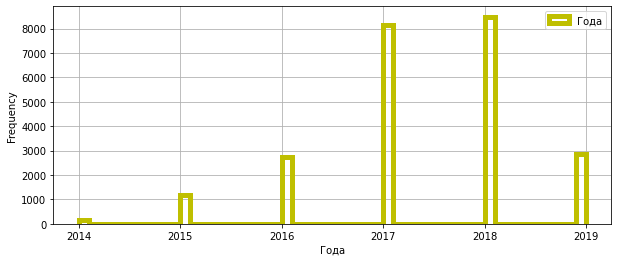

In [70]:
#гистрограмма количества объявлений в зависимости от дня недели публикации
ax = df.plot(kind='hist', y='weekday_exposition',histtype='step', bins=50, linewidth=5, figsize= (10, 4), grid=True, label='Дни')
ax.set_xlabel('Дни')
plt.show()
#гистрограмма количества объявлений в зависимости от месяца публикации
ax = df.plot(kind='hist', y='month_exposition',histtype='step', bins=50, linewidth=5, figsize= (10, 4), color='g', grid=True, label='Месяца')
ax.set_xlabel('Месяца')
plt.show()
#гистрограмма количества объявлений в зависимости от года публикации
ax = df.plot(kind='hist', y='year_exposition',histtype='step', bins=50, linewidth=5, figsize= (10, 4), color='y', grid=True, label='Года')
ax.set_xlabel('Года')
plt.show()

Исходя из графиков можно сделать любопытные выводы:

- больше всего выставляют объявлений в четверг, при этом в выходные дни количество размещаемых объявлений сокращается вполовину;
- самыми неактивными месяцами являются январь и май (возможно из-за обилия выходных дней), самыми активными месяцами оказались февраль, март и ноябрь, при этом в середине года наблюдается сокращение количетсва размещаемых объявлений;
- в датасете представлены опубликованные объявления за промежуток с 2014 по 2019 год, однако больше всего данных представлено за 2017 и 2018 года публикации.

**Шаг третий:** для выявления факторов, которые больше всего влияют на стоимость квартиры необходимо изучить, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра или от даты размещения: дня недели, месяца и года.

Text(0, 0.5, 'Цена, тыс. у.е.')

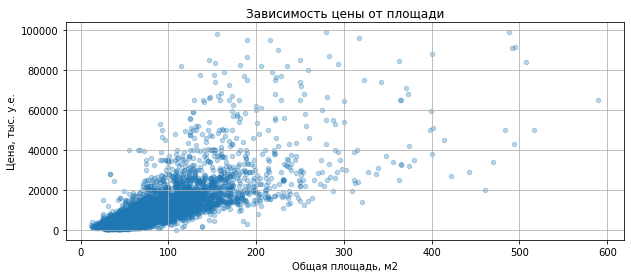

In [71]:
#график распределения зависимости цены от общей площади
ax = df.query('last_price <=100000').plot(kind='scatter', x='total_area', y='last_price', alpha=0.3,  grid=True, figsize = (10,4), title='Зависимость цены от площади')
ax.set_xlabel('Общая площадь, м2')
ax.set_ylabel('Цена, тыс. у.е.')

На графике зависимости цены от общей площади можно отметить прямую линейную зависимость - чем больше площадь, тем выше цена квартиры. Большинство объектов наблюдается в диапазоне площади до 200 м2 и стоимость у них коррелирует в диапазоне до 30 млн. у.е., однако есть и исключения из общей линии - квартиры с меньшей площадью имеют цены больше, чем квартиры с большей. Это уникальные случаи, на ценообразование которых могли повлиять в большей степени другие факторы, нежели исключительно площадь.

In [72]:
df['last_price'].describe()

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

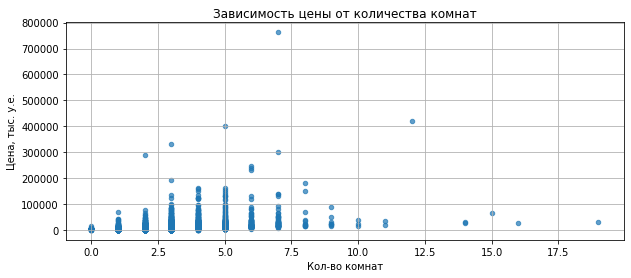

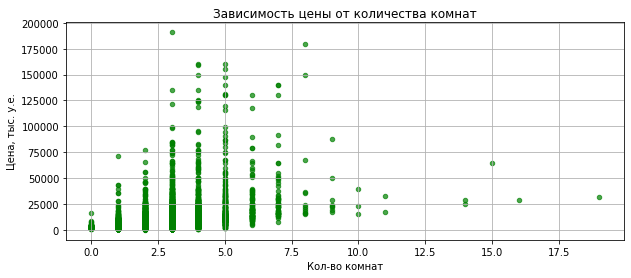

In [73]:
#график распределения зависимости цены от количества комнат
ax = df.plot(kind='scatter', x='rooms', y='last_price', alpha=0.7,  grid=True, figsize = (10,4), title='Зависимость цены от количества комнат')
ax.set_xlabel('Кол-во комнат')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()
#график распределения зависимости цены (стоимость менее 200 млн. у.е.) от количества комнат
ax = df.query('last_price <=200000').plot(kind='scatter', color='g', x='rooms', y='last_price', alpha=0.7,  grid=True, figsize = (10,4), title='Зависимость цены от количества комнат')
ax.set_xlabel('Кол-во комнат')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()

Количество комнат влияет на стоимость квартиры до момента вступления в силу других факторов. Наибольшая стоимость зафиксирована у 7 комнатной квартиры, хотя в данном исключительном случае сильно влияние остальных факторов, так как имеются квартиры с наибольшим количеством комнат, которые не могут похвастаться высокой ценой. В среднем 4х или 5ти комнатные квартиры стоят дороже студий, при этом однокомнатные и двухкомнатные квартиры стоят примерно одинаково - стоит отметить что на количество комнат напрямую влияет общая площадь квартиры, которая как мы ранее выяснили имеют прямую зависимость с ценой. Поэтому в данном случае правильней сказать, что количество комнат тесно связано с площадью, которая влияет на цену.

Text(0, 0.5, 'Цена, тыс. у.е.')

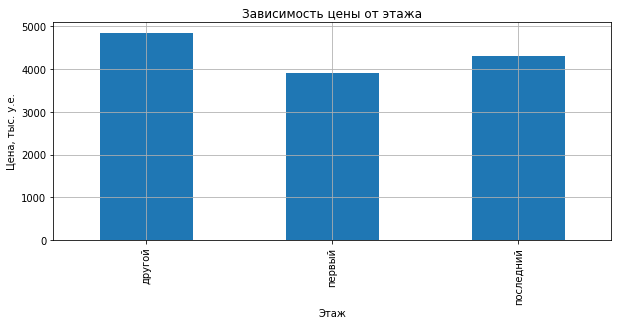

In [74]:
#график распределения зависимости цены от этажа
ax = df.groupby('floor_category')['last_price'].median().plot(kind='bar', figsize= (10, 4), grid=True, title='Зависимость цены от этажа')
ax.set_xlabel('Этаж')
ax.set_ylabel('Цена, тыс. у.е.')

Дороже всего квартиры, которые располагаются не на первом и не на последнем этажах (хотя есть расхожее мнение, что чем выше этаж, тем больше стоимость), дешевле всего квартиры на первом этаже. Хотя различие между стоимостью квартир на первом этаже и на последнем этажах не в разы отличается от стоимости от квартир на других этажах. Можно сказать, что этажность имеет не сильное влияние на ценообразование.

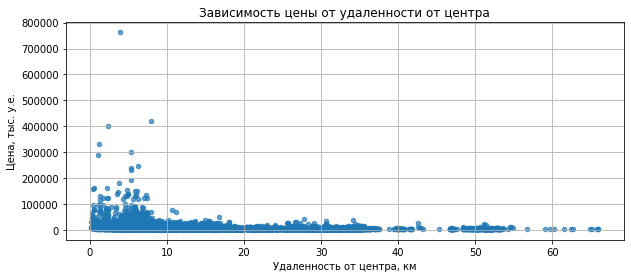

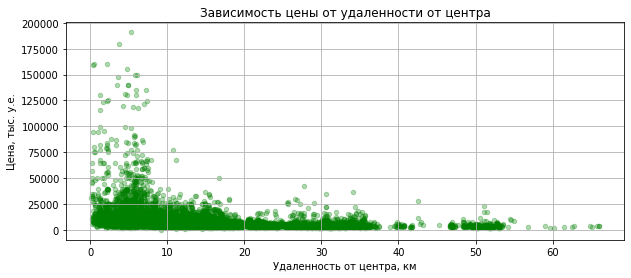

In [75]:
#график распределения зависимости цены от удаленности от центра
ax = df.plot(kind='scatter', x='cityCenters_nearest', y='last_price', alpha=0.7,  grid=True, figsize = (10,4), title='Зависимость цены от удаленности от центра')
ax.set_xlabel('Удаленность от центра, км')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()
#график распределения зависимости цены (стоимость менее 200 млн. у.е.) от удаленности от центра
ax = df.query('last_price <=200000').plot(kind='scatter', color='g', x='cityCenters_nearest', y='last_price', alpha=0.3,  grid=True, figsize = (10,4), title='Зависимость цены от удаленности от центра')
ax.set_xlabel('Удаленность от центра, км')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()

Отчетливо видно, что самые дорогие квартиры находятся в радиусе 10 км от центра. Однако стоит отметить, что нет четкой зависимости внутри радиуса 10 км от центра и цены - расстояние до основных инфраструктурных и культурных объектов безусловно влияет на стоимость квартиры, но в совокупности с другими факторами может корретировать цену.

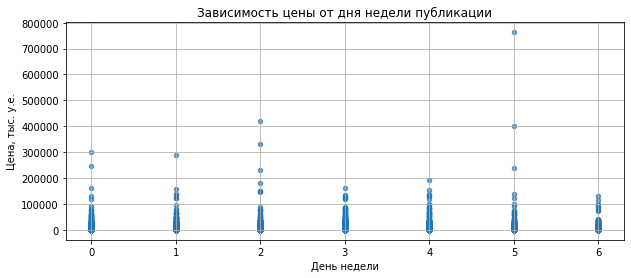

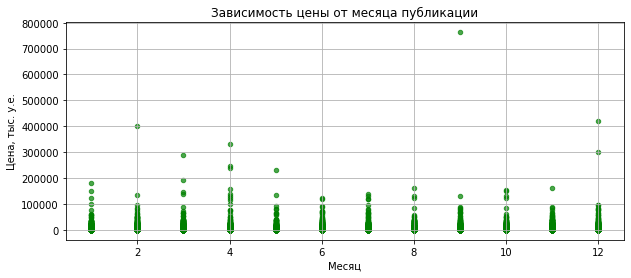

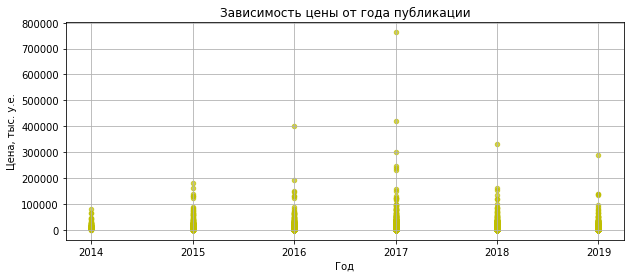

In [76]:
#график распределения зависимости цены от дня недели публикации
ax = df.plot(kind='scatter', x='weekday_exposition', y='last_price', alpha=0.7,  grid=True, figsize = (10,4), title='Зависимость цены от дня недели публикации')
ax.set_xlabel('День недели')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()
#график распределения зависимости цены от месяца публикации
ax = df.plot(kind='scatter', x='month_exposition', y='last_price', alpha=0.7, color='g', grid=True, figsize = (10,4), title='Зависимость цены от месяца публикации')
ax.set_xlabel('Месяц')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()
#график распределения зависимости цены от года публикации
ax = df.plot(kind='scatter', x='year_exposition', y='last_price', alpha=0.7, color='y',  grid=True, figsize = (10,4), title='Зависимость цены от года публикации')
ax.set_xlabel('Год')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()

Попробуем установить зависимость от дня публикации и стоимостью квартиры. Как мы помним - самое большое количество публикаций зафиксировано в среду, однако самые дешевые квартиры размещались как раз в среду, когда напротив в выходные количество публикаций заметно падало, в то время как одни из самых дорогих квартир были размещены как раз в субботу. Вполне возможно предположить, что это обусловлено разными целями продажи и различиями в психологическом поведении - это лишь предположение, однако видимая логическая зависимость отсутвует.

Аналогичная ситуация с месяцами и годами размещения - воля случая, когда была размещена та или иная недвижимость. Четкой взаимосвязи и жесткого паттерна в этой зависимости не наблюдается.

Составим матрицу корреляции и наглядно ее визуализируем, чтобы убедиться в правильности своих выводов.

                     last_price  total_area     rooms  cityCenters_nearest  \
last_price             1.000000    0.653621  0.363837            -0.206353   
total_area             0.653621    1.000000  0.759376            -0.231181   
rooms                  0.363837    0.759376  1.000000            -0.184669   
cityCenters_nearest   -0.206353   -0.231181 -0.184669             1.000000   
weekday_exposition     0.001357   -0.005680 -0.004519             0.009083   
month_exposition       0.002726    0.004961 -0.002369            -0.009780   
year_exposition       -0.042864   -0.079041 -0.055328             0.030134   

                     weekday_exposition  month_exposition  year_exposition  
last_price                     0.001357          0.002726        -0.042864  
total_area                    -0.005680          0.004961        -0.079041  
rooms                         -0.004519         -0.002369        -0.055328  
cityCenters_nearest            0.009083         -0.009780         0

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='last_price'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='last_price'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='total_area'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='total_area'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'

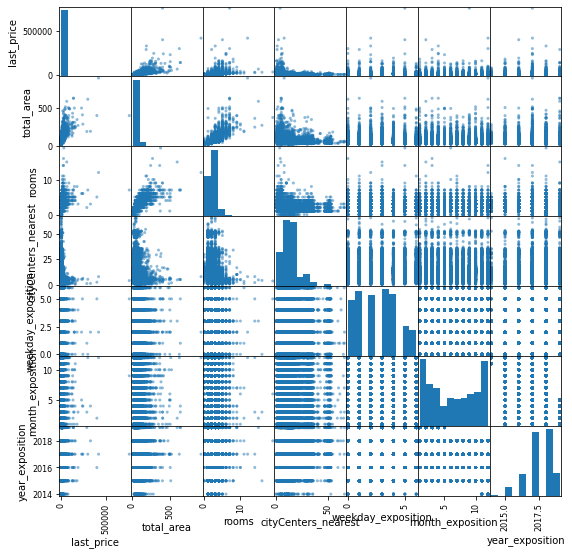

In [77]:
#составим датафрейм для матрицы
price_corr = df[['last_price','total_area', 'rooms', 'cityCenters_nearest', 'weekday_exposition', 'month_exposition', 'year_exposition']]
#выведем матрицу корреляции
print(price_corr.corr())
#построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(price_corr, figsize=(9, 9))

Изучив матрицу корреляции и визуализацию с помощью матрицы диаграмм рассеяния можно утвердиться в наших выводах:

- общая площадь значительно влияет на стоимость квартиры (0,65);
- количество комнат тоже влияет на стоимость, но из-за корреляции с площадью;
- расстояние до центра не имеет прямого влияния на стоимость равно как и день, месяц и год размещения публикации.

**Шаг четвертый:** необходимо проанализировать 10 населённых пунктов с наибольшим числом объявлений - для этого посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделить населённые пункты с самой высокой и низкой стоимостью жилья.

In [78]:
#создадим датафрейм со срезом населенных пунктов
top_10 = df['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Мы определили список населенных пунктов с наибольшим числом представленных объявлений. Далее сведем данные в таблицу по стоимости квадратного метра и выделим населенные пункты с самой высокой и низкой стоимостью жилья. 

In [79]:
#создадим сводную таблицу из среза населенных пунктов и отсортируем по возрастанию по средней стоимости квадратного метра
top_10_price = df.query('locality_name in @top_10.index').pivot_table(index='locality_name', values='price_per_meter').sort_values(by=['price_per_meter'], ascending=False)
top_10_price

,price_per_meter
locality_name,
Санкт-Петербург,114.868877
Пушкин,103.125819
деревня Кудрово,92.473548
посёлок Парголово,90.175913
посёлок Мурино,85.673260
посёлок Шушары,78.551345
Колпино,75.424579
Гатчина,68.746147
Всеволожск,68.654474


In [80]:
#найдем населенные пункты с самой низкой и высокой стоимостью жилья
print('Населённый пункт с самой высокой стоимостью жилья -', top_10_price.index[0])
print('Населённый пункт с самой низкой стоимостью жилья -', top_10_price.index[-1])

Населённый пункт с самой высокой стоимостью жилья - Санкт-Петербург
Населённый пункт с самой низкой стоимостью жилья - Выборг


**Шаг пятый:** для того чтобы изучить квартиры в центре Санкт-Петербурга необходимо проанализировать эту территорию и найти зону, которая образует центр. Также необходимо изучить следующие параметры: площадь, цена, число комнат, высота потолков, выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Отличаются ли они от общих выводов по всему городу?

In [81]:
#создадим датафрейм с объявлениями из Санкт-Петербурга
SP = df.loc[(df['locality_name'] == 'Санкт-Петербург')]
SP

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_of_living_area_to_total_area,ratio_of_kitchen_area_to_total_area
0,20,13000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8,True,...,2.0,0.755,NaN,120.370370,3,3,2019,другой,47.2,23.1
2,10,5196.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4,True,...,2.0,0.574,558.0,92.785714,3,8,2015,другой,61.2,14.8
3,0,64900.0,159.00,2015-07-24,3.0,2.65,14.0,45.0,9,True,...,3.0,0.234,424.0,408.176101,4,7,2015,другой,28.3,6.3
4,2,10000.0,100.00,2018-06-19,2.0,3.03,14.0,32.0,13,True,...,1.0,0.048,121.0,100.000000,1,6,2018,другой,32.0,6.4
7,5,7915.0,71.60,2019-04-18,2.0,2.65,24.0,30.5,22,True,...,0.0,3.100,NaN,110.544693,3,4,2019,другой,42.6,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550.0,35.30,2018-02-28,1.0,2.86,15.0,16.3,4,True,...,2.0,0.652,29.0,100.566572,2,2,2018,другой,46.2,25.8
23690,3,5500.0,52.00,2018-07-19,2.0,2.65,5.0,31.0,2,True,...,0.0,3.100,15.0,105.769231,3,7,2018,другой,59.6,11.5
23691,11,9470.0,72.90,2016-10-13,2.0,2.75,25.0,40.3,7,True,...,1.0,0.806,519.0,129.903978,3,10,2016,другой,55.3,14.5
23694,9,9700.0,133.81,2017-03-21,3.0,3.70,5.0,73.3,3,True,...,3.0,0.381,NaN,72.490845,1,3,2017,другой,54.8,10.3


15 651 объявление о продаже квартир представлено в городе Санкт-Петербург.

Создадим столбец с округленным расстоянием до центра города.

In [82]:
#столбец с округленным расстоянием до центра города
SP['distance_to_the_center'] = SP['cityCenters_nearest'].round(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Расстояние до центра Санкт-Петербурга')

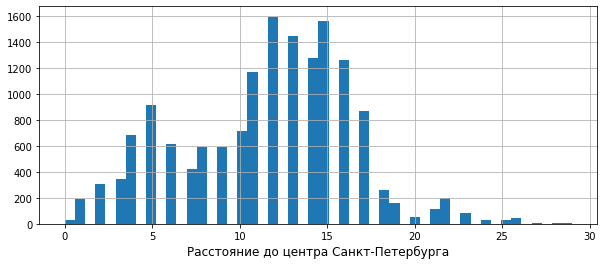

In [83]:
#гистограмма растояния до центра города
SP['distance_to_the_center'].hist(bins = 50, figsize= (10, 4)).set_xlabel('Расстояние до центра Санкт-Петербурга', fontsize=12)

Большая часть квартир в Санкт-Петербурге находится в зоне от 10 до 15 км от центра. Является ли этот диапазон частью центра. Построим график цен в зависимости от удаленности от центра и проверим.

array([[<AxesSubplot:title={'center':'distance_to_the_center'}>]],
      dtype=object)

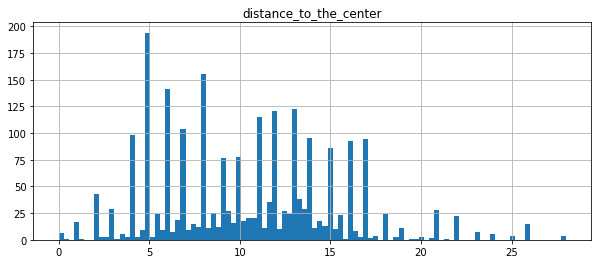

In [84]:
#гистограмма зависимости цены от удаленности от центра Санкт-Петербурга
SP.pivot_table(index='last_price', values='distance_to_the_center').hist(bins = 100, figsize= (10, 4))

Пик стоимости квартир приходится на 5ый километр от центра города. В диапазоне от 5 до 7 км цены находятся на стабильном уровке, после 7 км следует резкий спад - соответсвенно можно предположить, что граница центральной зоны города Санкт-Петербурга находится на отметке 7 км от центра города. 

In [85]:
#создадим датафрейм центральной зоны Санкт-Петербурга
SP_center = SP.query('distance_to_the_center <= 7')
SP_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_of_living_area_to_total_area,ratio_of_kitchen_area_to_total_area,distance_to_the_center
3,0,64900.0,159.00,2015-07-24,3.0,2.65,14.0,45.0,9,True,...,0.234,424.0,408.176101,4,7,2015,другой,28.3,6.3,7.0
24,8,6500.0,97.20,2015-10-31,2.0,2.65,3.0,46.5,1,True,...,0.124,265.0,66.872428,5,10,2015,первый,47.8,20.2,2.0
35,6,15500.0,149.00,2017-06-26,5.0,2.65,5.0,104.0,4,True,...,0.779,644.0,104.026846,0,6,2017,другой,69.8,11.4,4.0
51,7,45000.0,161.00,2017-10-17,3.0,3.20,8.0,38.0,4,True,...,0.099,541.0,279.503106,1,10,2017,другой,23.6,4.7,7.0
52,20,11795.0,136.00,2017-09-22,6.0,3.00,2.0,94.0,2,True,...,3.100,NaN,86.727941,4,9,2017,последний,69.1,8.1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250.0,47.00,2016-05-20,1.0,2.65,6.0,18.2,1,False,...,0.519,131.0,90.425532,4,5,2016,первый,38.7,31.1,5.0
23681,13,5250.0,43.00,2018-05-11,2.0,2.50,5.0,29.0,2,True,...,0.660,80.0,122.093023,4,5,2018,другой,67.4,14.0,7.0
23690,3,5500.0,52.00,2018-07-19,2.0,2.65,5.0,31.0,2,True,...,3.100,15.0,105.769231,3,7,2018,другой,59.6,11.5,6.0
23691,11,9470.0,72.90,2016-10-13,2.0,2.75,25.0,40.3,7,True,...,0.806,519.0,129.903978,3,10,2016,другой,55.3,14.5,4.0


3 518 объявление о продаже квартир представлено в центре города Санкт-Петербург - это 23 процента от общего количества представленных в городе квартир.

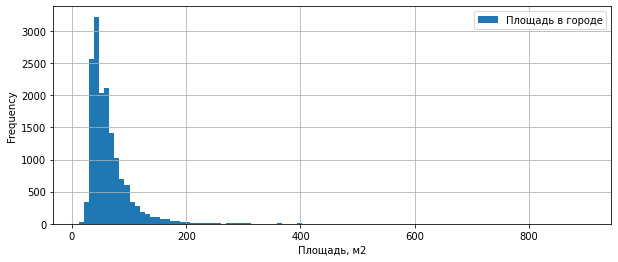

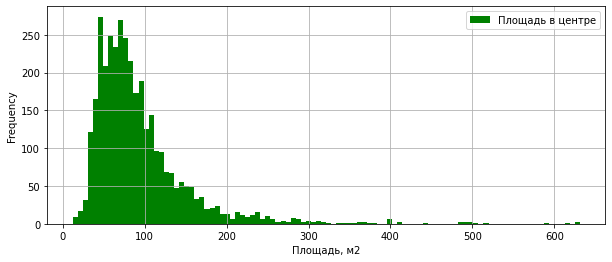

In [86]:
#гистограмма распределения площади в городе Санкт-Петербург
ax = SP.plot(kind='hist', y='total_area', bins=100,  figsize= (10, 4), grid=True, label='Площадь в городе')
ax.set_xlabel('Площадь, м2')
plt.show()
#гистограмма распределения площади в центре города Санкт-Петербург
ax = SP_center.plot(kind='hist', y='total_area', bins=100,  figsize= (10, 4), color='g', grid=True, label='Площадь в центре')
ax.set_xlabel('Площадь, м2')
plt.show()

В центре как и в целом по городу преобладают квартиры площадью до 100 м2, однако в центре немалый процент квартир имеют большую площадь. Можно сказать, что большая часть больших квартир находится в центре города.

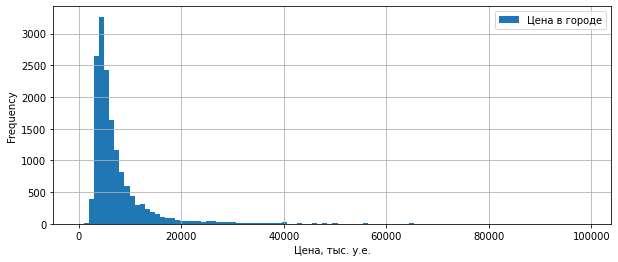

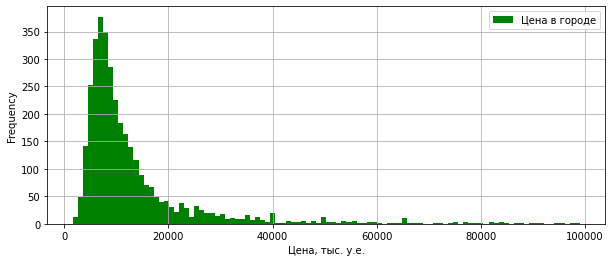

In [87]:
#гистограмма распределения цены в городе Санкт-Петербург
ax = SP.query('last_price < 100000').plot(kind='hist', y='last_price', bins=100,  figsize= (10, 4), grid=True, label='Цена в городе')
ax.set_xlabel('Цена, тыс. у.е.')
plt.show()
#гистограмма распределения цены в центре города Санкт-Петербург
ax = SP_center.query('last_price < 100000').plot(kind='hist', y='last_price', bins=100,  figsize= (10, 4), color='g', grid=True, label='Цена в городе')
ax.set_xlabel('Цена, тыс. у.е.')
plt.show()

Средняя цена квартиру как в центре так и по всему городу находится на уровне в 10 млн у.е. Однако важно отметить, что по городу большинство квартир стоят от 5 млн у.е. до 10 млн у.е., так как центре этот диапазон расширяется до 20 млн у.е. Из чего можно сделать вывод, что квартиры в центре могут быть дороже, чем по всему городу.

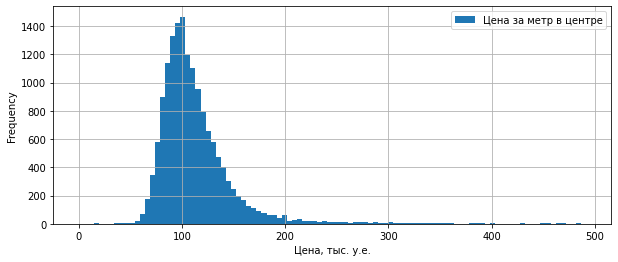

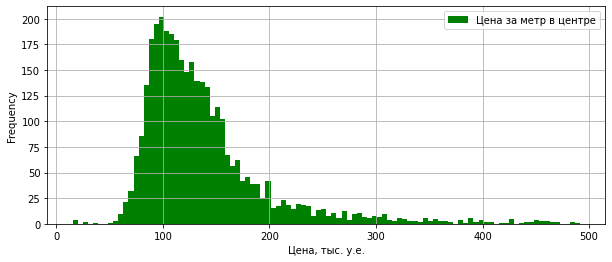

In [88]:
#гистограмма распределения цены за метр в городе Санкт-Петербург
ax = SP.query('price_per_meter < 500').plot(kind='hist', y='price_per_meter', bins=100,  figsize= (10, 4), grid=True, label='Цена за метр в центре')
ax.set_xlabel('Цена, тыс. у.е.')
plt.show()
#гистограмма распределения цены за метр в центре города Санкт-Петербург
ax = SP_center.query('price_per_meter < 500').plot(kind='hist', y='price_per_meter', bins=100,  figsize= (10, 4), color='g', grid=True, label='Цена за метр в центре')
ax.set_xlabel('Цена, тыс. у.е.')
plt.show()

Средняя цена за квадратный метр как в центре так и по всему городу находится на уровне в 100 тыс у.е. Однако важно отметить, что по городу большинство квартир со стоимостью квадратного метра от 50 тыс у.е. до 140 тыс у.е., так как центре этот диапазон расширяется до 200 тыс у.е. Аналогично общей цене за квартиры. Из чего можно сделать вывод, что квартиры в центре могут иметь боллее дорогой квадратный метр, чем по всему городу.

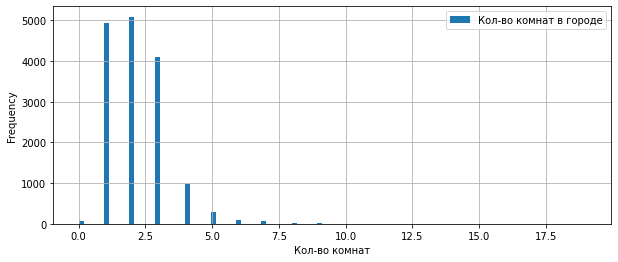

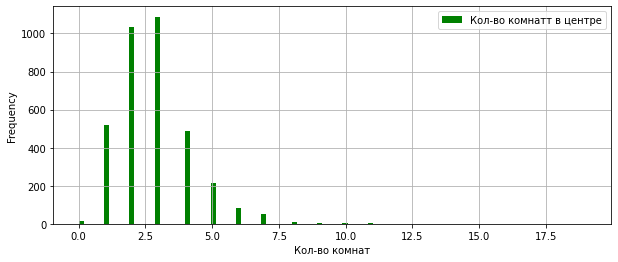

In [89]:
#гистограмма распределения кол-ва комнат в городе Санкт-Петербург
ax = SP.plot(kind='hist', y='rooms', bins=100,  figsize= (10, 4), grid=True, label='Кол-во комнат в городе')
ax.set_xlabel('Кол-во комнат')
plt.show()
#гистограмма распределения кол-ва комнат в центре города Санкт-Петербург
ax = SP_center.plot(kind='hist', y='rooms', bins=100, color='g', figsize= (10, 4), grid=True, label='Кол-во комнатт в центре')
ax.set_xlabel('Кол-во комнат')
plt.show()

В среднем по городу преобладают однокомнатные и двухкомнатные квартиры, в то время как в центре больше двухкомнатрых и трехкомнатных квартир - что объясняется относительно большей площадью квартир в центре. Соответсвенно этот фактор может иметь непосредственное влияние на цены в центре. 

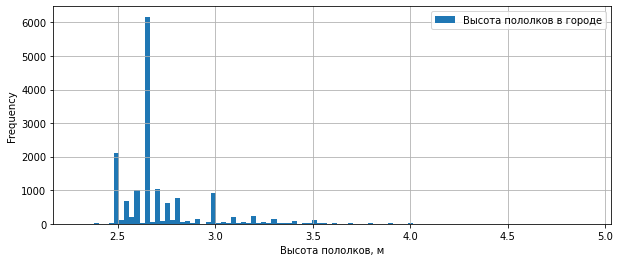

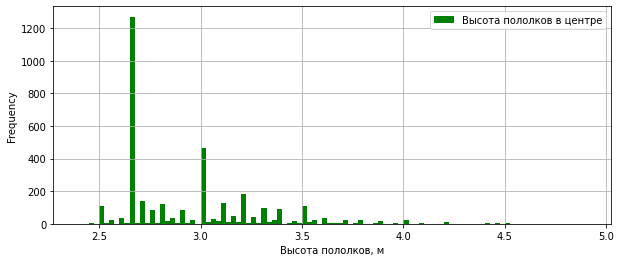

In [90]:
#гистограмма распределения высоты потолков в городе Санкт-Петербург
ax = SP.plot(kind='hist', y='ceiling_height', bins=100,  figsize= (10, 4), grid=True, label='Высота пололков в городе')
ax.set_xlabel('Высота пололков, м')
plt.show()
#гистограмма распределения высоты потолков в центре города Санкт-Петербург
ax = SP_center.plot(kind='hist', y='ceiling_height', bins=100, color='g',  figsize= (10, 4), grid=True, label='Высота пололков в центре')
ax.set_xlabel('Высота пололков, м')
plt.show()

По всему городу распростанены потолки 2,65м, как и в центре города. Также нередки потолки большей высоты, что однозначно не может нам дать информацию о том, что в центре потолки в квартирах выше или ниже.

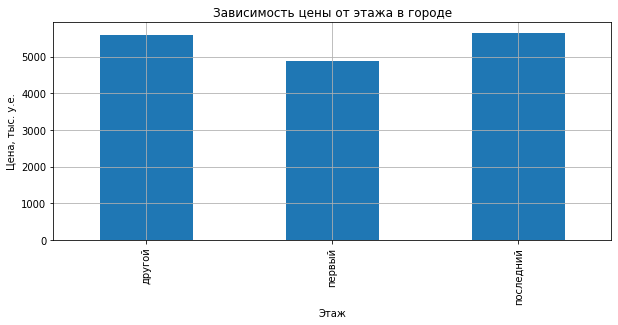

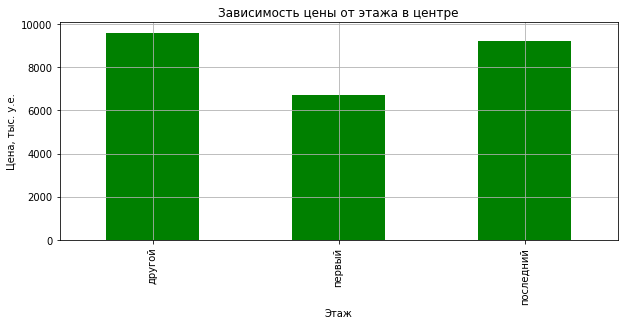

In [91]:
#график распределения зависимости цены от этажа в городе Санкт-Петербург
ax = SP.groupby('floor_category')['last_price'].median().plot(kind='bar', figsize= (10, 4), grid=True, title='Зависимость цены от этажа в городе')
ax.set_xlabel('Этаж')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()
#график распределения зависимости цены от этажа в центре города Санкт-Петербург
ax = SP_center.groupby('floor_category')['last_price'].median().plot(kind='bar', figsize= (10, 4), color='g', grid=True, title='Зависимость цены от этажа в центре')
ax.set_xlabel('Этаж')
ax.set_ylabel('Цена, тыс. у.е.')
plt.show()

Нельзя выделить четкие различия влияния этажности на стоимость квартир в центре и по всему городу. Ценообразование в данной области не сильно зависит от фактора этажности и подчиняется общей тенденции. 

In [92]:
#составим датафрейм для матрицы в городе Санкт-Петербург
SP_price_corr = SP[['last_price', 'rooms', 'cityCenters_nearest', 'weekday_exposition', 'month_exposition', 'year_exposition']]
#выведем матрицу корреляции
print('в городе Санкт-Петербург', SP_price_corr.corr())
print('')
#составим датафрейм для матрицы в центре города Санкт-Петербург
SP_center_price_corr = SP_center[['last_price', 'rooms', 'cityCenters_nearest', 'weekday_exposition', 'month_exposition', 'year_exposition']]
#выведем матрицу корреляции
print('в центре города Санкт-Петербург',SP_center_price_corr.corr())

в городе Санкт-Петербург                      last_price     rooms  cityCenters_nearest  \
last_price             1.000000  0.372635            -0.259220   
rooms                  0.372635  1.000000            -0.294222   
cityCenters_nearest   -0.259220 -0.294222             1.000000   
weekday_exposition     0.006046 -0.008215             0.000379   
month_exposition      -0.000022 -0.006719             0.007455   
year_exposition       -0.044603 -0.061854             0.085204   

                     weekday_exposition  month_exposition  year_exposition  
last_price                     0.006046         -0.000022        -0.044603  
rooms                         -0.008215         -0.006719        -0.061854  
cityCenters_nearest            0.000379          0.007455         0.085204  
weekday_exposition             1.000000          0.003689        -0.001939  
month_exposition               0.003689          1.000000        -0.278403  
year_exposition               -0.001939         -0

Исходя из матриц корреляции мы можем установить, что по всему городу влияние количества комнат на стоимость квартиры немного выше, чем в центральной его части, по остальным параметрам можно сделать однознычный вывод об отсутствии влияния данных факторов на стоимость квартиры.

### Вывод

В ходе этапа "Исследовательский анализ данных" были выполнены шаги по изучению параметров исследуемых данных, а также их на ценовые характеристики.
- подтверждена линейная зависимость площадей друг от друга, а также прямая зависимость стоимости квартиры от площади, 
- найдены соотношения площадей исследуемых квартир (Жилая площадь составляет от 50 до 65 процентов от общей площади объекта, в то время как площадь кухни занимает всего лишь 15 процентов), 
- выявлен диапазон стоимости квартир (от 2 млн. у.е. до 6 млн. у.е.),
- выявлено преобладание однокомнатных и двухкомнатных квартир - 67 процентов от общего количества квартир,
- установлено среднее время продажи квартиры – 3 месяца,
- установлено, что больше всего объявлений публикуется в четверг февраля или марта,
- установлено, что этажность не сильно влияет на стоимость квартиры, однако самые дешевые как правило находятся на первом этаже,
- чем ближе к центральной зоне населенного пункта, тем выше стоимость квартиры, однако в центральной зоне на стоимость влияют другие факторы,
- в исследуемых данных населённый пункт с самой высокой стоимостью жилья - Санкт-Петербург, а населённый пункт с самой низкой стоимостью жилья – Выборг,
- выявлена центральная зона Санкт-Петербурга – 7 км от центра города,
- в центральной зоне квартиры немного больше и дороже, чем по всему городу.

### Шаг 5. Общий вывод <a name="step5"></a>

При оценке данных было выявлено, что имеются отклонения в данных и их необходимо предварительно обработать.
В ходе работы была произведена замена типа данных, работа с числовыми значениями, обработка пропущенных значений, выбросов и нулей, также добавлены новые данные в исходный датасет для дальнейшего анализа.
По результат предобработки необходимо отметит, что большое количество пропущенных значений и ошибок было допущено в результате ввода данных пользователем, ввиду возможности игнорирования ввода данных из-за их необязательности. Также стоит обратить внимание на выгрузку картографических данных. 
В ходе анализа данных были выявлены параметры, которые прямым образом влияют на ценообразование:
- общая площадь объекта, а также количество комнат – прямая зависимость;
- удаленность от центра и инфраструктурных объектов понижают стоимость;
- этажность (квартиры на первом этаже дешевле);
- высота потолков в незначительной степени;
- день, месяц и год размещения публикации не имеют прямого влияния.
Эти параметры помогут в реализации автоматизированной системы по отслеживанию аномалий и мошеннической деятельности на рынке недвижимости.